In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
# Load dataset
df = pd.read_csv("C:\\Users\\Krishnendu\\Downloads\\India Road Accident Dataset.csv")

In [55]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [56]:
# Basic check
print(df.head())
print(df.info())

          State_Name City_Name  Year    Month Day_of_Week Time_of_Day  \
0  Jammu and Kashmir   Unknown  2021      May      Monday        1:46   
1      Uttar Pradesh   Lucknow  2018  January   Wednesday       21:30   
2       Chhattisgarh   Unknown  2023      May   Wednesday        5:37   
3      Uttar Pradesh   Lucknow  2020     June    Saturday        0:31   
4             Sikkim   Unknown  2021   August    Thursday       11:21   

  Accident_Severity  Number_of_Vehicles_Involved Vehicle_Type_Involved  \
0           Serious                            5                 Cycle   
1             Minor                            5                 Truck   
2             Minor                            5            Pedestrian   
3             Minor                            3                   Bus   
4             Minor                            5                 Cycle   

   Number_of_Casualties  ...         Road_Type      Road_Condition  \
0                     0  ...  National Highway

In [57]:
print(df['Time_of_Day'].unique())


['1:46' '21:30' '5:37' ... '21:36' '10:16' '19:36']


In [58]:
# Convert 'Time_of_Day' to datetime and extract hour
df['Time_of_Day'] = pd.to_datetime(df['Time_of_Day'], errors='coerce').dt.hour

C:\Users\Krishnendu\AppData\Local\Temp\ipykernel_29508\1568820305.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_of_Day'] = pd.to_datetime(df['Time_of_Day'], errors='coerce').dt.hour


In [59]:
# Drop rows where hour couldn't be extracted
df = df.dropna(subset=['Time_of_Day'])


In [60]:
# Convert float to int
df['Time_of_Day'] = df['Time_of_Day'].astype(int)

In [61]:
# Group into buckets
def map_hour_to_period(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'
df['Time_Period'] = df['Time_of_Day'].apply(map_hour_to_period)

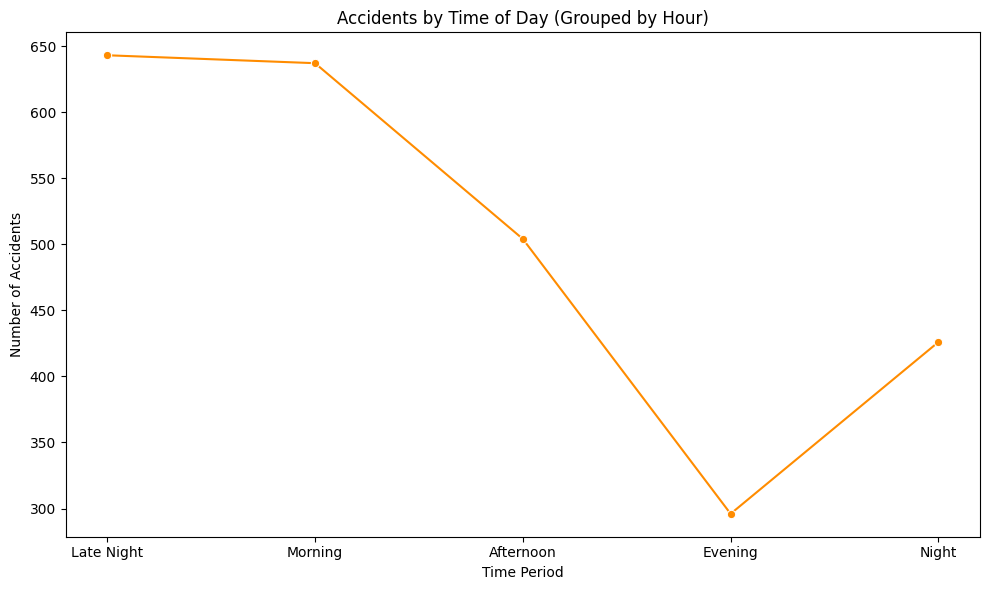

In [62]:
# Plot clean line graph
time_order = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']
period_counts = df['Time_Period'].value_counts().reindex(time_order)

plt.figure(figsize=(10, 6))
sns.lineplot(x=period_counts.index, y=period_counts.values, marker='o', color='darkorange')
plt.title("Accidents by Time of Day (Grouped by Hour)")
plt.xlabel("Time Period")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()


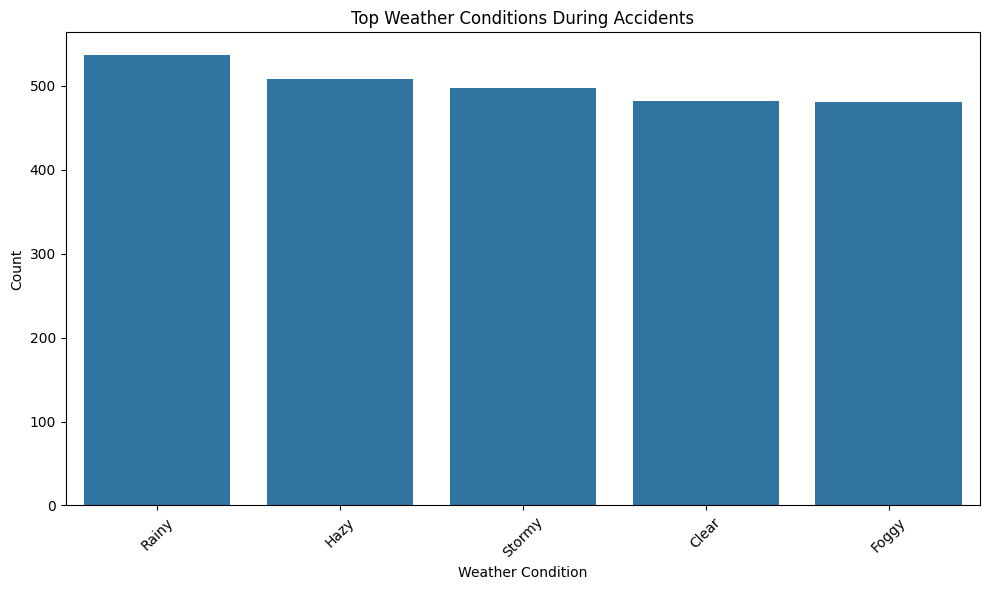

In [68]:
# 2. Accidents by Weather Conditions
plt.figure(figsize=(10, 6))
top_weather = df['Weather_Conditions'].value_counts().head(10)
sns.barplot(x=top_weather.index, y=top_weather.values)
plt.title("Top Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

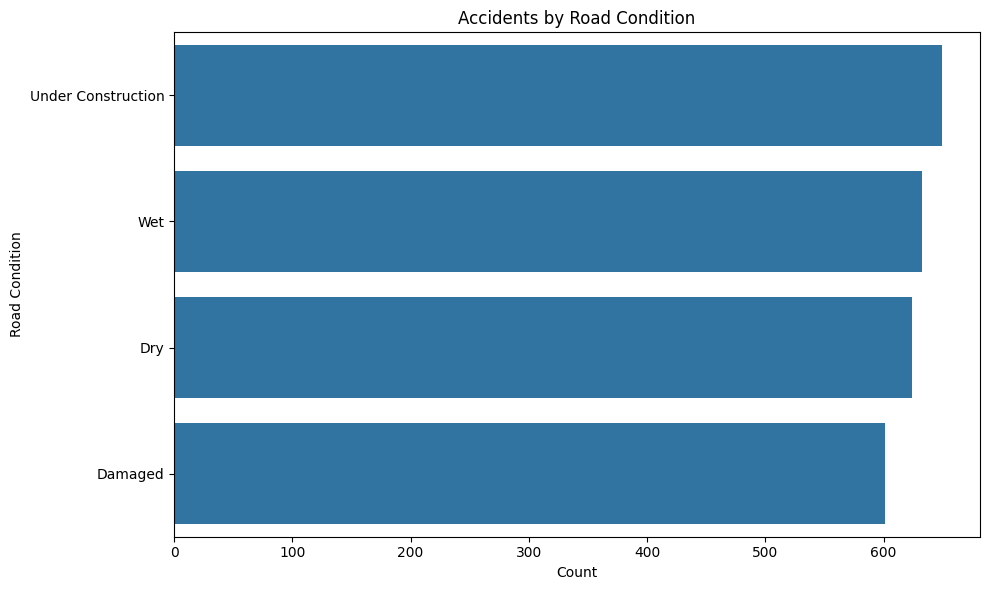

In [64]:
# 3. Accidents by Road Condition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Road_Condition', order=df['Road_Condition'].value_counts().index)
plt.title("Accidents by Road Condition")
plt.ylabel("Road Condition")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

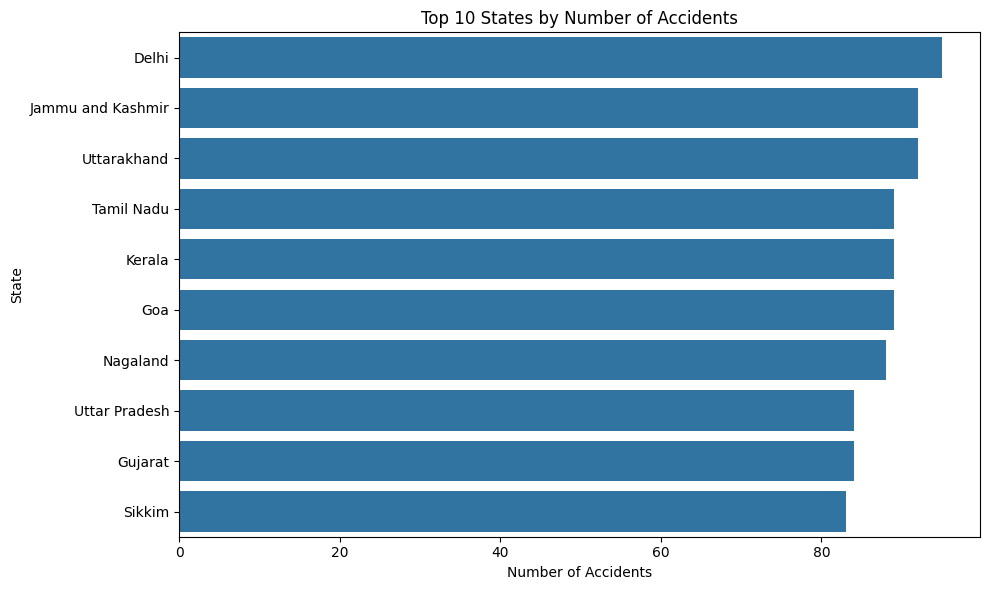

In [65]:
# 4. Top 10 Accident Hotspot States
plt.figure(figsize=(10, 6))
top_states = df['State_Name'].value_counts().head(10)
sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 10 States by Number of Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("State")
plt.tight_layout()
plt.show()